Initial State
s1 [-1, 0, -1, 0]
s2 [-1, 0, 0, 0]
s3 [-1, 0, 0, 0]
s4 [-1, 0, 0, -1]
s5 [0, 0, -1, 0]
s6 [-1, -1, -1, -1]
s7 [0, 0, 0, 0]
s8 [0, 0, 0, -1]
s9 [0, -1, -1, 0]
s10 [0, -1, 0, 0]
s11 [0, -1, 0, 0]
s12 [0, -1, 0, -1]
End State
s1 [-1, 90.0, -1, 90.0]
s2 [-1, 100.0, 81.0, 81.0]
s3 [-1, 90.0, 90.0, 72.9]
s4 [-1, 0, 81.0, -1]
s5 [81.0, 81.0, -1, 100.0]
s6 [-1, -1, -1, -1]
s7 [81.0, 81.0, 100.0, 81.0]
s8 [72.9, 72.9, 90.0, -1]
s9 [90.0, -1, -1, 90.0]
s10 [100.0, -1, 81.0, 81.0]
s11 [90.0, -1, 90.0, 72.9]
s12 [81.0, -1, 81.0, -1]


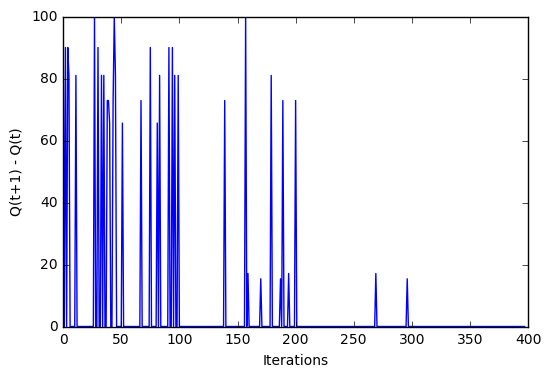

In [2]:

####################################### Reinforcement Learning: Deterministic Case #################################################################
import numpy as np
import matplotlib.pyplot as plt
from random import randint


def get_initial_boardState():
    qTable = {}
    
    for i in range (0,12):
        qTable[i] = [0,0,0,0]   # Four Values represent UP, DOWN, LEFT , RIGHT RESPECTIVELY
    
    # 0 - UP, 1- DOWN, 2-LEFT, 3-RIGHT
    #Defining the restrictions of the action on the boundary states accroding to the board, giving them the value as -1
   
    qTable[0][0] = -1
    qTable[0][2] = -1
    
    qTable[1][0] = -1
    
    qTable[2][0] = -1
    
    qTable[3][0] = -1
    qTable[3][3] = -1
    
    qTable[4][2] = -1
    
    # Since s6 is our goal State --- here indexed at 5 as we are using the zero indexed problems
    qTable[5][0] = -1
    qTable[5][1] = -1
    qTable[5][2] = -1
    qTable[5][3] = -1

    
    
    qTable[7][3] = -1
    
    qTable[8][1] = -1
    qTable[8][2] = -1
    
    qTable[9][1] = -1
    
    qTable[10][1] = -1
    
    qTable[11][1] = -1
    qTable[11][3] = -1
    print 'Initial State'
    print_board(qTable)
    return qTable
    

# Print Board Values
def print_board(qTable):
    for i in range(0,12):
        print 's' + str(i+1), qTable[i]

def Get_Random_Move(movesCnt):
    return randint(0,movesCnt);

def Get_Random_State(statesCnt):
    return randint(0,statesCnt)

def Get_target_state(Current_State, move):
    map_move = {
        0 : -4,
        1 : +4,
        2 : -1,
        3 : +1,
    }
    return Current_State + map_move[move]
    
    
def q_Learning(qTable, gamma):
    states_Cnt = 11 # 0 indexed
    moves_Cnt = 3   # 0 indexed
    
    current_diff = 0
    prev_diff = 0
    prev_QTableSum = 0
    currentQTableSum = 0
    breakingCounter = 0
    first_Move = True
    
    goal_state = 5
    num_iterations =0
    source_state = 0
    target_state = 0
    inGoalState = True
    
    #PLot Data
    plot_data = []
    
    while True:
        num_iterations += 1
        
        #Compute the Q-Value by randomly selecting the state action move
        maxQval = -1
        reward = 0        
        
        if inGoalState or source_state == goal_state:
            source_state = Get_Random_State(states_Cnt)
        else:
            if not first_Move:
                source_state = target_state
        
        
        random_direction = Get_Random_Move(moves_Cnt)
        
        #Check the move is valid or not
        
        if(qTable[source_state][random_direction] != -1):
            first_Move = False
            target_state = Get_target_state(source_state , random_direction)

            for i in range(0,4):
                if qTable[target_state][i] > maxQval:
                    maxQval = qTable[target_state][i]
            
            if target_state == goal_state:
                reward = 100
                inGoalState = True
                first_Move = True
                maxQval = 0
            if source_state != goal_state:   
                qTable[source_state][random_direction] = reward + (gamma * maxQval)
               
        for val, list_val in qTable.items():
            for item in list_val:
                if(item != -1):
                    currentQTableSum += item
    
        current_diff = abs(currentQTableSum - prev_QTableSum)
        
        plot_data.append(current_diff)
        
        prev_QTableSum = currentQTableSum
        currentQTableSum = 0


        if current_diff == 0 and prev_diff == 0:
            breakingCounter += 1
        else:
            breakingCounter = 0;
        
        prev_diff = current_diff

        if breakingCounter >= 100:
            print 'End State'
            print_board(qTable)
            return plot_data


import matplotlib.pyplot as plt
def plot_graph(values):
    plt.plot(values)
    plt.ylabel('Q(t+1) - Q(t)')
    plt.xlabel('Iterations')
    plt.show()
    
    
qTable = get_initial_boardState()

gamma = 0.9
plot_data = q_Learning(qTable, gamma)
plot_graph(plot_data)

